<a href="https://colab.research.google.com/github/Andrzej94-ai/kaggle/blob/main/kaagle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import bibliotek

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Analiza zbioru

In [2]:
data = pd.read_csv("/content/AmesHousing.csv")

###Analiza braków danych


In [3]:
braki = data.describe().T
braki_num_columns = braki[braki['count'] != 2930.0].T.columns

braki[braki['count'] != 2930.0]

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2440.0,69.224590,23.365335,21.0,58.0,68.0,80.0,313.0
Mas Vnr Area,2907.0,101.896801,179.112611,0.0,0.0,0.0,164.0,1600.0
BsmtFin SF 1,2929.0,442.629566,455.590839,0.0,0.0,370.0,734.0,5644.0
BsmtFin SF 2,2929.0,49.722431,169.168476,0.0,0.0,0.0,0.0,1526.0
Bsmt Unf SF,2929.0,559.262547,439.494153,0.0,219.0,466.0,802.0,2336.0
Total Bsmt SF,2929.0,1051.614544,440.615067,0.0,793.0,990.0,1302.0,6110.0
Bsmt Full Bath,2928.0,0.431352,0.524820,0.0,0.0,0.0,1.0,3.0
Bsmt Half Bath,2928.0,0.061134,0.245254,0.0,0.0,0.0,0.0,2.0
Garage Yr Blt,2771.0,1978.132443,25.528411,1895.0,1960.0,1979.0,2002.0,2207.0
Garage Cars,2929.0,1.766815,0.760566,0.0,1.0,2.0,2.0,5.0


In [4]:
#obejrzenie jednego z pustego wiersza
data['BsmtFin SF 1'][data['BsmtFin SF 1'].isnull()]

1341   NaN
Name: BsmtFin SF 1, dtype: float64

In [5]:
#braki danych uzupełnione medianą
braki_mediana = braki[(braki['count'] == 2929.0) | (braki['count'] == 2928.0)].T.columns
data[braki_mediana] = data[braki_mediana].fillna(data[braki_mediana].median())

In [6]:
data['BsmtFin SF 1'][1341]

370.0

In [7]:
#ponowne spojrzenie na puste wartości wśród kolumn zawierających liczby
braki = data.describe().T
braki_num_columns = braki[braki['count'] != 2930.0].T.columns

braki[braki['count'] != 2930.0]

,count,mean,std,min,25%,50%,75%,max
Lot Frontage,2440.0,69.224590,23.365335,21.0,58.0,68.0,80.0,313.0
Mas Vnr Area,2907.0,101.896801,179.112611,0.0,0.0,0.0,164.0,1600.0
Garage Yr Blt,2771.0,1978.132443,25.528411,1895.0,1960.0,1979.0,2002.0,2207.0


In [8]:
data['Have_Garage'] = data['Garage Yr Blt'].notnull().map(int)
data.drop(['Garage Yr Blt'], axis = 1, inplace=True)

In [9]:
#jeśli brak informacji to zamieniam na 0.0
data['Mas Vnr Area'] = data['Mas Vnr Area'].fillna(0.0)
data['Lot Frontage'] = data['Lot Frontage'].fillna(0.0)

In [10]:
#ponowne spojrzenie na puste wartości wśród kolumn zawierających liczby
braki = data.describe().T
braki_num_columns = braki[braki['count'] != 2930.0].T.columns

braki[braki['count'] != 2930.0]

,count,mean,std,min,25%,50%,75%,max


Analiza braku danych - dane objectowe

In [11]:
data_object = data.select_dtypes('object').count().reset_index()
data_object[data_object[0] != 2930].reset_index(drop=True)

,index,0
0,Alley,198
1,Mas Vnr Type,2907
2,Bsmt Qual,2850
3,Bsmt Cond,2850
4,Bsmt Exposure,2847
5,BsmtFin Type 1,2850
6,BsmtFin Type 2,2849
7,Electrical,2929
8,Fireplace Qu,1508
9,Garage Type,2773


In [12]:
#Sprawdzenie braku danych dla kategorii Electrical i uzupełnienie braku najbardziej popularną kategorią
print(data.groupby(by='Electrical')['Electrical'].count())

data['Electrical'] = data['Electrical'].fillna('SBrkr')

Electrical
FuseA     188
FuseF      50
FuseP       8
Mix         1
SBrkr    2682
Name: Electrical, dtype: int64


Po analizie pozostałych kolumn typu object stwierdziłem, że wartość pusta niesie za sobą informację braku posiadania pewnej cechy - zostanie to zaopiekowane za pomocą funkcji OneHotEncoder

In [13]:
#brak innych typów zmiennych
data.select_dtypes(exclude = ['object', 'int64', 'float64']).columns

Index([], dtype='object')

###Analiza danych odstających

Order                 AxesSubplot(0.125,0.865646;0.352273x0.0143536)
PID                AxesSubplot(0.547727,0.865646;0.352273x0.0143536)
MS SubClass           AxesSubplot(0.125,0.848422;0.352273x0.0143536)
Lot Frontage       AxesSubplot(0.547727,0.848422;0.352273x0.0143536)
Lot Area              AxesSubplot(0.125,0.831198;0.352273x0.0143536)
Overall Qual       AxesSubplot(0.547727,0.831198;0.352273x0.0143536)
Overall Cond          AxesSubplot(0.125,0.813973;0.352273x0.0143536)
Year Built         AxesSubplot(0.547727,0.813973;0.352273x0.0143536)
Year Remod/Add        AxesSubplot(0.125,0.796749;0.352273x0.0143536)
Mas Vnr Area       AxesSubplot(0.547727,0.796749;0.352273x0.0143536)
BsmtFin SF 1          AxesSubplot(0.125,0.779525;0.352273x0.0143536)
BsmtFin SF 2       AxesSubplot(0.547727,0.779525;0.352273x0.0143536)
Bsmt Unf SF             AxesSubplot(0.125,0.7623;0.352273x0.0143536)
Total Bsmt SF        AxesSubplot(0.547727,0.7623;0.352273x0.0143536)
1st Flr SF            AxesSubplot(

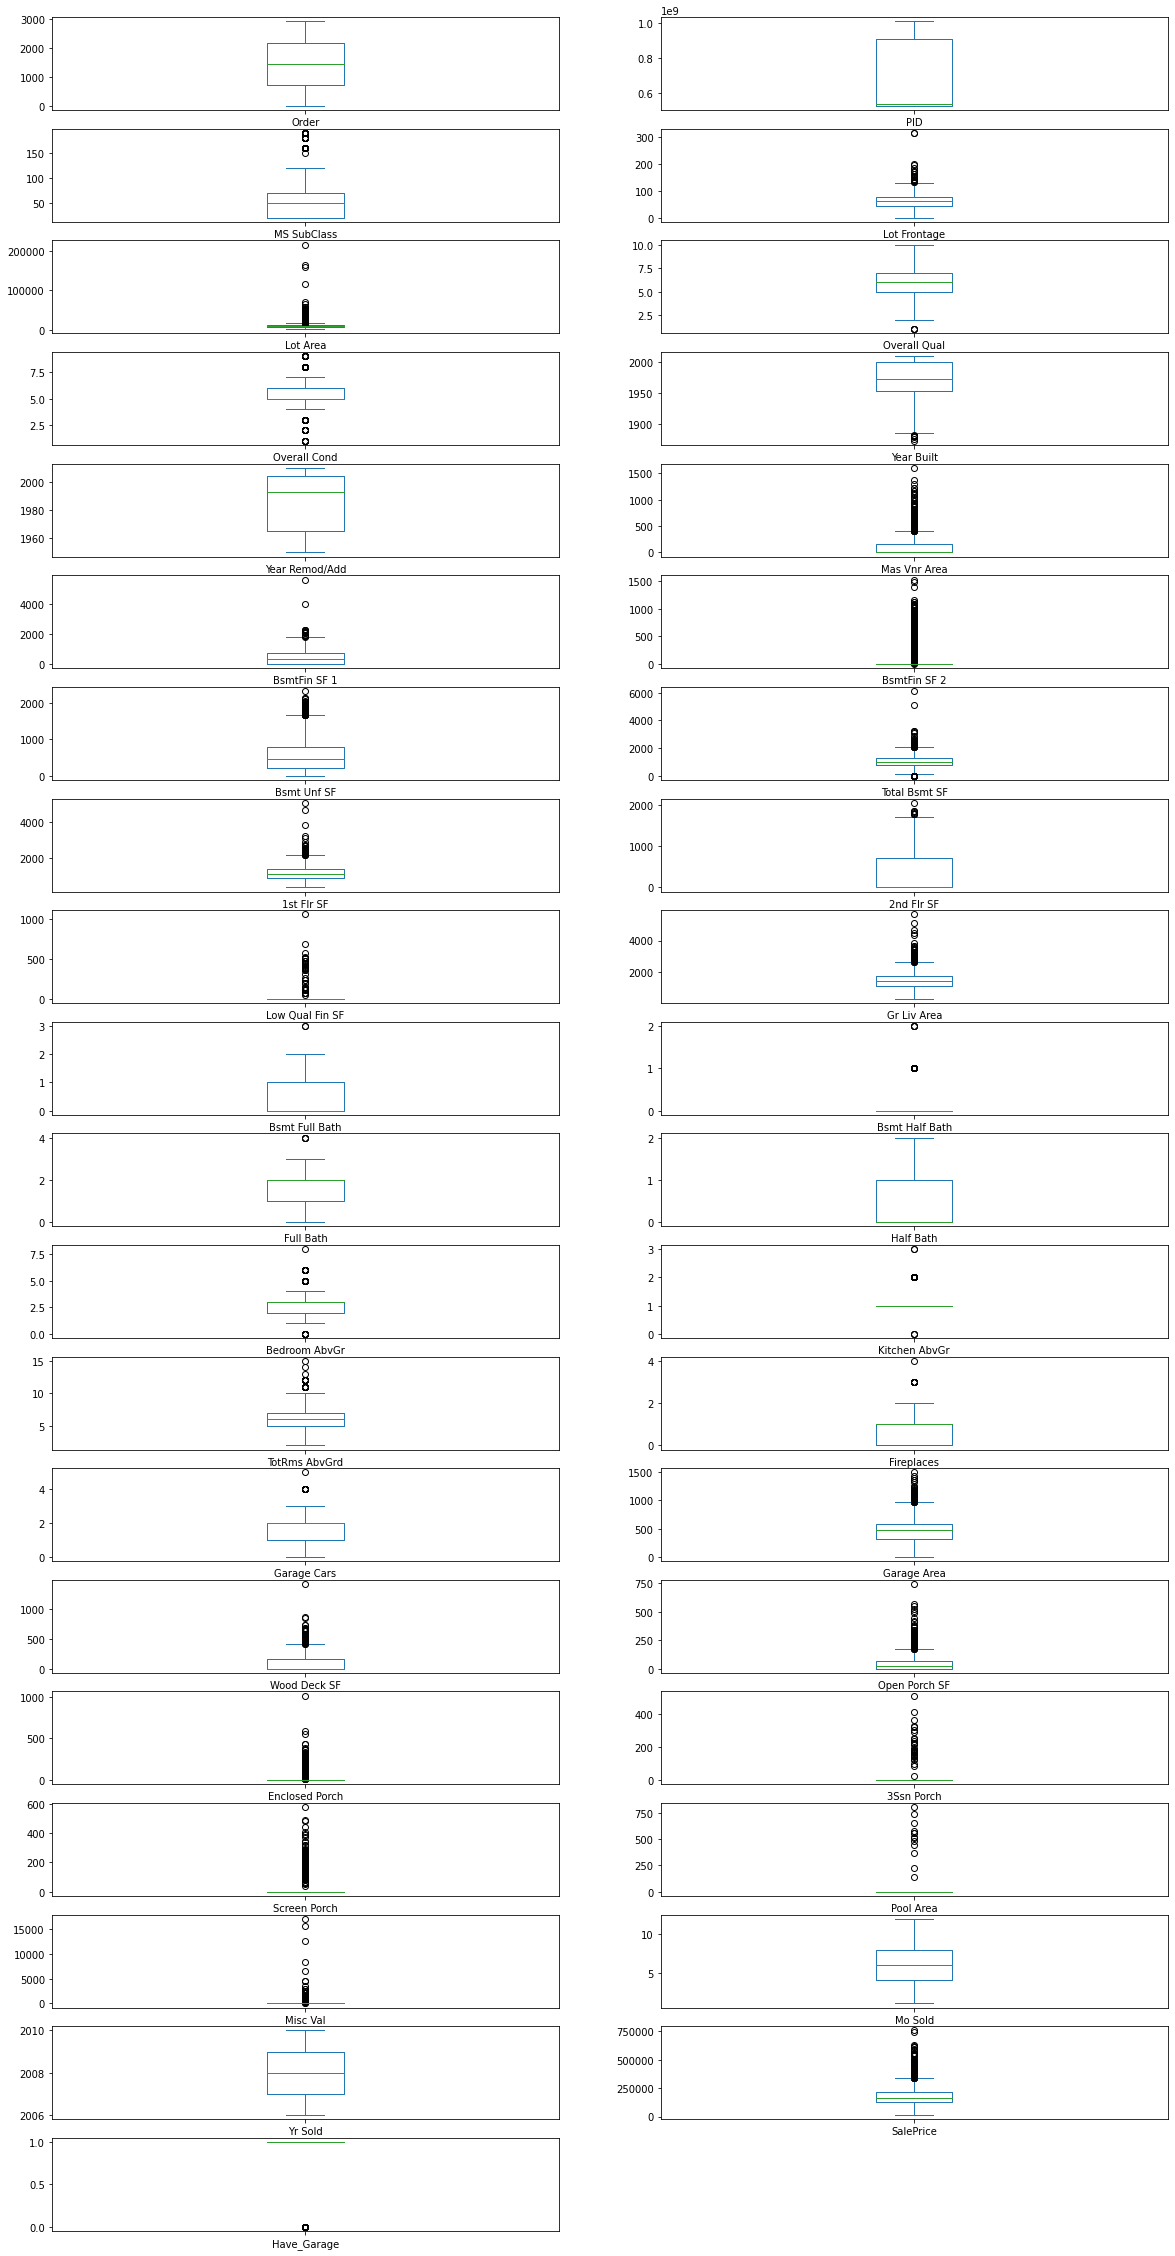

In [14]:
data.plot.box(layout=(44,2), subplots=True, sharex=False, sharey=False, vert=True, figsize=(20.0,90.0))

In [15]:
data.quantile([0.01, 0.25, 0.5, 0.75, 0.99]).round().T
#Kolumny, które można byłoby rozważyć do usunięcia
#Low Qual Fin SF	, Bsmt Half Bath, Enclosed Porch, 3Ssn Porch, Screen Porch, Pool Area, Misc Val

,0.01,0.25,0.50,0.75,0.99
Order,30.0,733.0,1466.0,2198.0,2901.0
PID,527106399.0,528477022.0,535453620.0,907181098.0,923275031.0
MS SubClass,20.0,20.0,50.0,70.0,190.0
Lot Frontage,0.0,43.0,63.0,78.0,132.0
Lot Area,1680.0,7440.0,9436.0,11555.0,32989.0
Overall Qual,3.0,5.0,6.0,7.0,10.0
Overall Cond,3.0,5.0,5.0,6.0,9.0
Year Built,1900.0,1954.0,1973.0,2001.0,2008.0
Year Remod/Add,1950.0,1965.0,1993.0,2004.0,2009.0
Mas Vnr Area,0.0,0.0,0.0,163.0,770.0


In [16]:
q1 = data.quantile(0.25) 
q3 = data.quantile(0.75) 
iqr = q3 - q1 # rozstęp międzykwartylowy

low_boundary = (q1 - 1.5 * iqr)
upp_boundary = (q3 + 1.5 * iqr)
num_of_outliers_L = (data[iqr.index] < low_boundary).sum()
num_of_outliers_U = (data[iqr.index] > upp_boundary).sum()
outliers_15iqr = pd.DataFrame({'lower_boundary':low_boundary, 'upper_boundary':upp_boundary,'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})
outliers_15iqr.round(2)

,lower_boundary,upper_boundary,num_of_outliers_L,num_of_outliers_U
Order,-1463.50,4.394500e+03,0,0
PID,-39579090.00,1.475237e+09,0,0
MS SubClass,-55.00,1.450000e+02,0,208
Lot Frontage,-9.50,1.305000e+02,0,31
Lot Area,1267.75,1.772775e+04,0,127
Overall Qual,2.00,1.000000e+01,4,0
Overall Cond,3.50,7.500000e+00,67,185
Year Built,1883.50,2.071500e+03,9,0
Year Remod/Add,1906.50,2.062500e+03,0,0
Mas Vnr Area,-244.12,4.068800e+02,0,203


In [17]:
data_without_outliers = data.copy()
print('Rozmiar zbioru z obserwacjami odstającymi:', data_without_outliers.shape[0])
for row in outliers_15iqr.iterrows():
    data_without_outliers = data_without_outliers[(data_without_outliers[row[0]] >= row[1]['lower_boundary']) & (data_without_outliers[row[0]] <= row[1]['upper_boundary'])]
print('Rozmiar zbioru po usunięciu obserwacji odstających:', data_without_outliers.shape[0])

Rozmiar zbioru z obserwacjami odstającymi: 2930
Rozmiar zbioru po usunięciu obserwacji odstających: 1091


Z uwagi na zbyt dużą liczbę obserwacji "odstających" nie zastosuję tego kroku do budowania modelu - temat wymagałby poszerzenia.

Podstawowe statystyki oraz wizualizacja rozkładów zmiennych niezależnych

In [18]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Order,2930.0,1.465500e+03,8.459625e+02,1.0,7.332500e+02,1465.5,2.197750e+03,2.930000e+03
PID,2930.0,7.144645e+08,1.887308e+08,526301100.0,5.284770e+08,535453620.0,9.071811e+08,1.007100e+09
MS SubClass,2930.0,5.738737e+01,4.263802e+01,20.0,2.000000e+01,50.0,7.000000e+01,1.900000e+02
Lot Frontage,2930.0,5.764778e+01,3.349944e+01,0.0,4.300000e+01,63.0,7.800000e+01,3.130000e+02
Lot Area,2930.0,1.014792e+04,7.880018e+03,1300.0,7.440250e+03,9436.5,1.155525e+04,2.152450e+05
Overall Qual,2930.0,6.094881e+00,1.411026e+00,1.0,5.000000e+00,6.0,7.000000e+00,1.000000e+01
Overall Cond,2930.0,5.563140e+00,1.111537e+00,1.0,5.000000e+00,5.0,6.000000e+00,9.000000e+00
Year Built,2930.0,1.971356e+03,3.024536e+01,1872.0,1.954000e+03,1973.0,2.001000e+03,2.010000e+03
Year Remod/Add,2930.0,1.984267e+03,2.086029e+01,1950.0,1.965000e+03,1993.0,2.004000e+03,2.010000e+03
Mas Vnr Area,2930.0,1.010969e+02,1.786345e+02,0.0,0.000000e+00,0.0,1.627500e+02,1.600000e+03


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


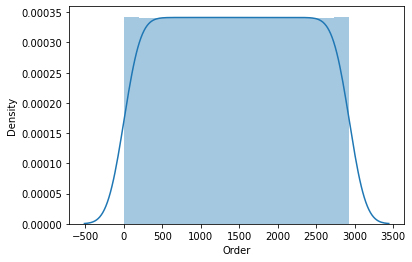

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


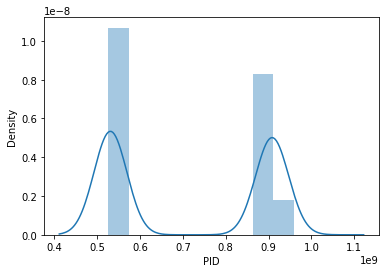

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


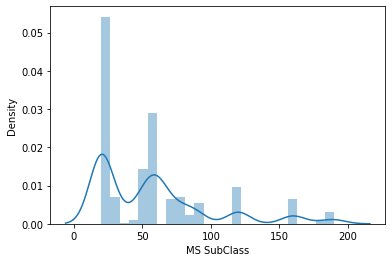

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


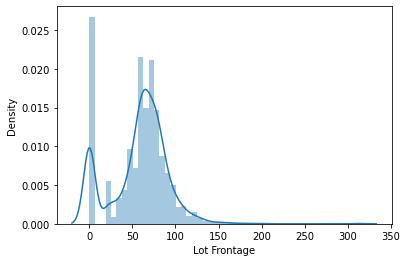

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


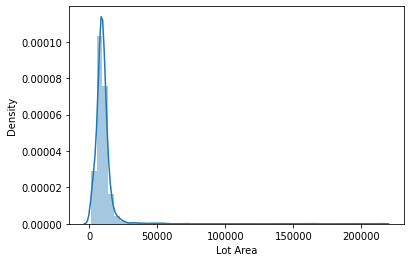

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


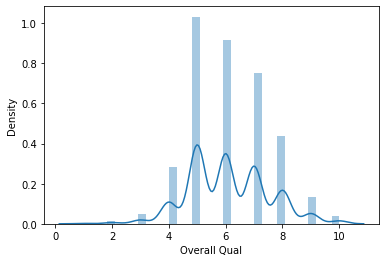

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


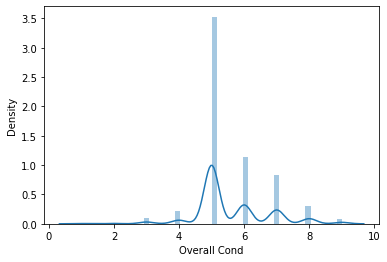

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


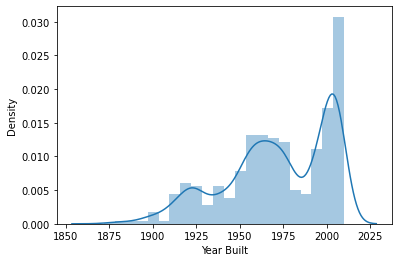

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


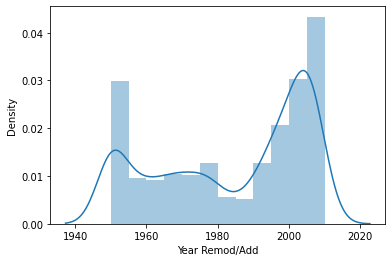

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


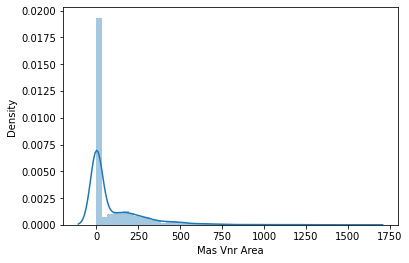

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


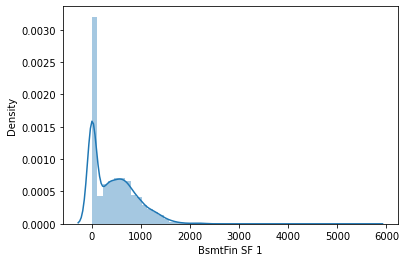

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


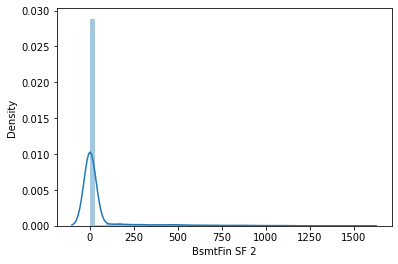

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


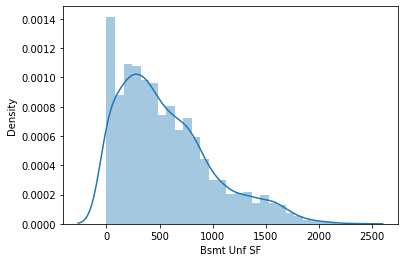

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


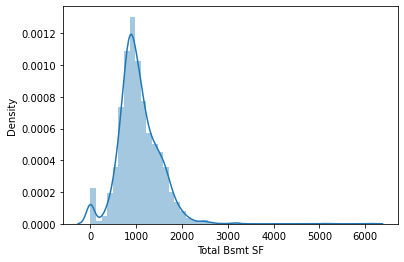

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


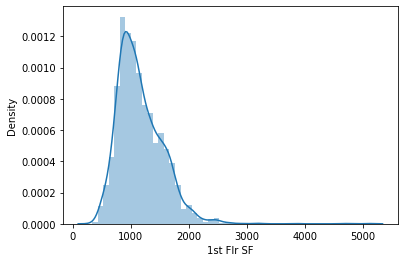

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


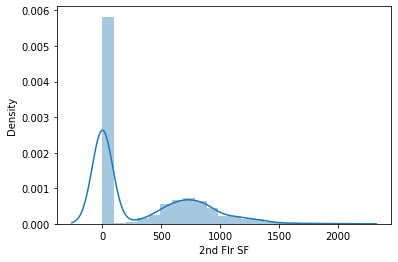

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


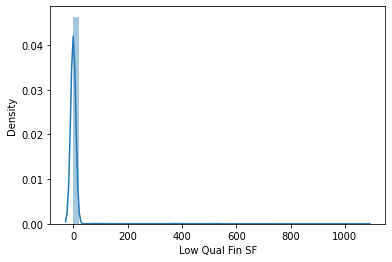

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


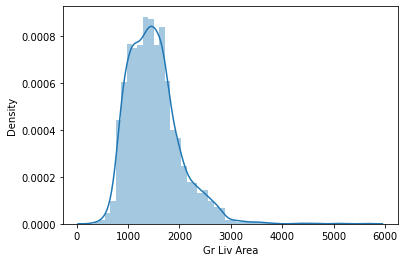

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


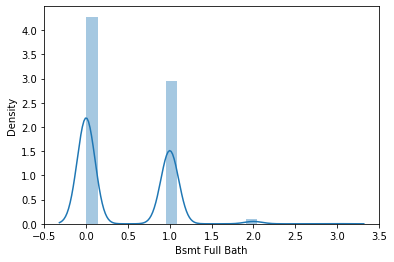

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


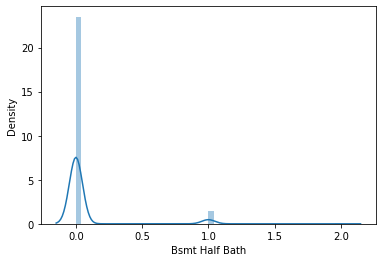

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


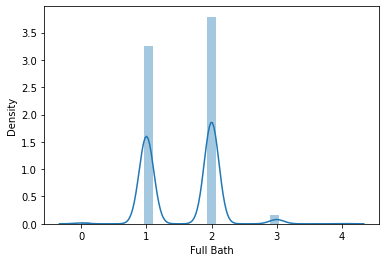

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


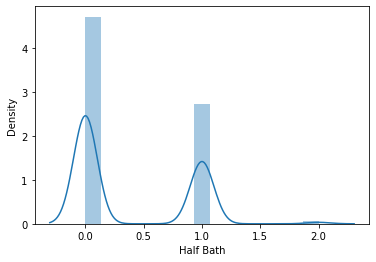

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


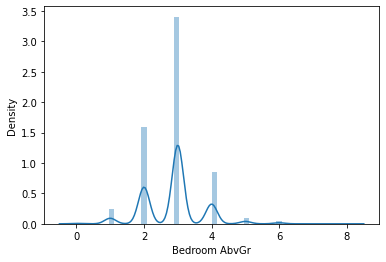

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


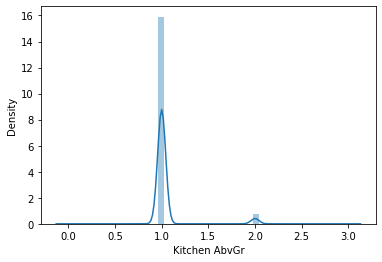

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


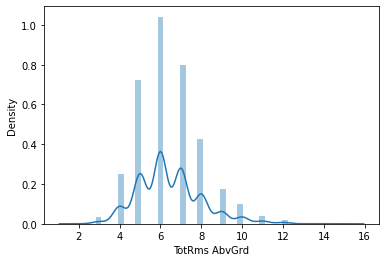

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


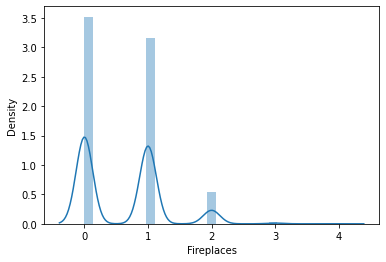

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


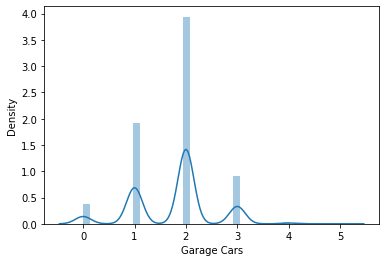

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


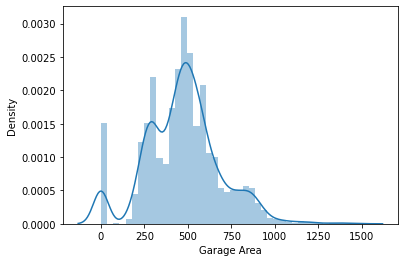

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


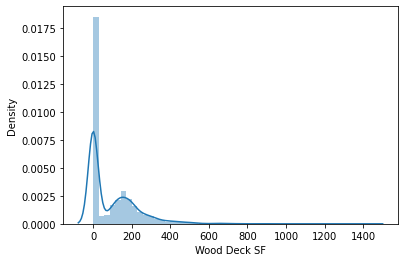

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


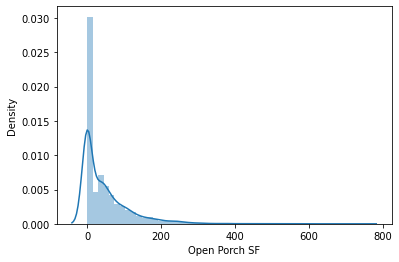

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


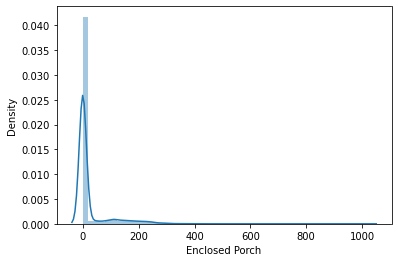

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


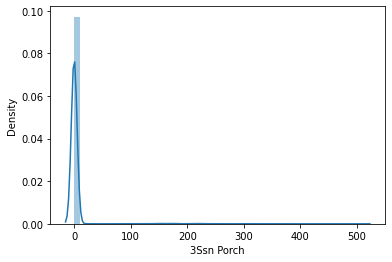

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


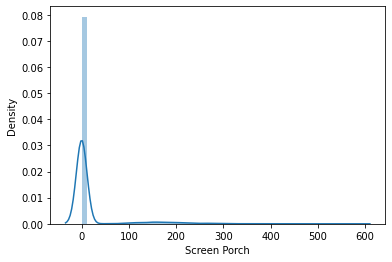

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


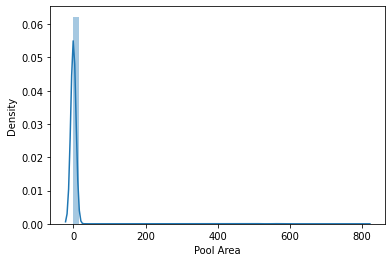

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


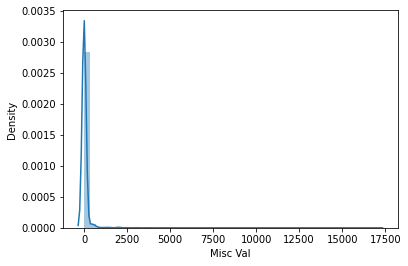

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


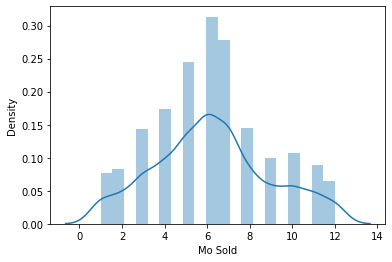

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


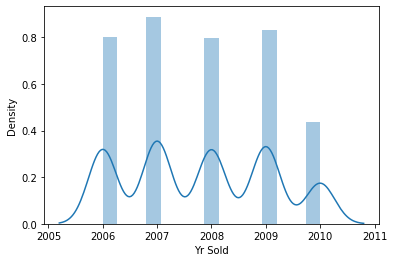

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


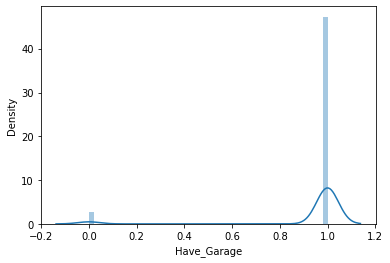

In [19]:
import seaborn as sns
for i in data.drop('SalePrice', axis = 1).select_dtypes(exclude = 'object').columns:
  sns.distplot(data[i])
  plt.show()

Sprawdzenie rozkładu klasy zmiennej objaśniającej

(0.0, 320.0)

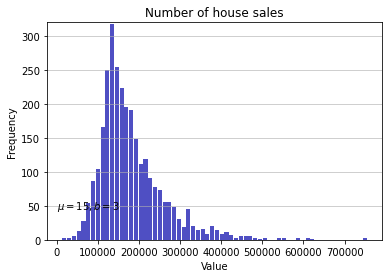

In [20]:
# An "interface" to matplotlib.axes.Axes.hist() method 
n, bins, patches = plt.hist(x=data['SalePrice'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number of house sales')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


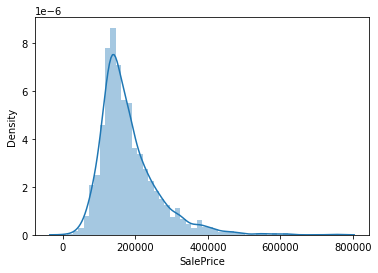

In [21]:
sns.distplot(data['SalePrice'])
plt.show()

2. Sprawdzenie mocy predykcji poszczególnych atrybutów

In [22]:
data.corr().style.background_gradient(cmap='coolwarm')

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Have_Garage
Order,1.000000,0.173593,0.011797,0.008748,0.031354,-0.048500,-0.011054,-0.052319,-0.075566,-0.031045,-0.032313,-0.002758,0.005791,-0.028712,-0.013201,-0.000417,0.013589,-0.009342,-0.042499,0.024987,-0.044985,-0.039749,0.015424,-0.017685,0.002612,-0.019156,-0.036084,-0.035420,-0.011292,0.016355,0.027908,-0.024975,0.004307,0.052518,-0.006083,0.133365,-0.975993,-0.031408,-0.019824
PID,0.173593,1.000000,-0.001281,-0.038104,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.225672,-0.098412,-0.001245,-0.087763,-0.189656,-0.141902,-0.003289,0.056940,-0.107579,-0.038306,0.004154,-0.171431,-0.166636,0.006345,0.076470,-0.068981,-0.108056,-0.237328,-0.210555,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521,-0.147565
MS SubClass,0.011797,-0.001281,1.000000,-0.233959,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.003634,-0.060019,-0.070847,-0.130339,-0.219374,-0.247828,0.304237,0.025765,0.068061,0.014187,-0.003179,0.134631,0.175879,-0.019208,0.257698,0.031898,-0.049955,-0.045851,-0.103234,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092,-0.107977
Lot Frontage,0.008748,-0.038104,-0.233959,1.000000,0.136862,0.128840,-0.034675,0.026130,0.069509,0.109858,0.067387,-0.005254,0.139774,0.207227,0.241707,-0.002813,0.019315,0.186767,0.019554,-0.031798,0.082826,-0.029367,0.112718,0.022127,0.200488,0.051240,0.142698,0.186760,0.001162,0.085480,0.024824,0.004061,0.045789,0.109439,0.003098,0.017357,-0.011737,0.201875,0.012504
Lot Area,0.031354,0.034868,-0.204613,0.136862,1.000000,0.097188,-0.034759,0.023258,0.021682,0.125950,0.191574,0.083198,0.023696,0.253601,0.332235,0.032996,0.000812,0.285599,0.124208,0.026448,0.127433,0.035497,0.136569,-0.020301,0.216597,0.256989,0.179494,0.212819,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549,0.073653
Overall Qual,-0.048500,-0.263147,0.039419,0.128840,0.097188,1.000000,-0.094812,0.597027,0.569609,0.423089,0.284091,-0.041122,0.270062,0.547157,0.477837,0.241402,-0.048680,0.570556,0.168373,-0.041433,0.522263,0.268853,0.063291,-0.159744,0.380693,0.393007,0.599392,0.563436,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262,0.248908
Overall Cond,-0.011054,0.104451,-0.067349,-0.034675,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.132472,-0.050991,0.040992,-0.136872,-0.173356,-0.157052,0.006218,0.009175,-0.115643,-0.043458,0.084185,-0.214316,-0.088127,-0.006137,-0.086386,-0.089816,-0.031702,-0.181508,-0.153745,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697,0.031910
Year Built,-0.052319,-0.343388,0.036579,0.026130,0.023258,0.597027,-0.368773,1.000000,0.612095,0.306797,0.279881,-0.027328,0.129042,0.407516,0.310463,0.016828,-0.144282,0.241726,0.212119,-0.030515,0.469406,0.269268,-0.055093,-0.137852,0.111919,0.170672,0.537033,0.479903,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426,0.216896
Year Remod/Add,-0.075566,-0.157111,0.043397,0.069509,0.021682,0.569609,0.047680,0.612095,1.000000,0.191740,0.151809,-0.061934,0.164847,0.297421,0.242108,0.158939,-0.060365,0.316855,0.134590,-0.046175,0.457266,0.211771,-0.021536,-0.142404,0.197528,0.133322,0.425434,0.376414,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974,0.112278
Mas Vnr Area,-0.031045,-0.225672,0.003634,0.109858,0.125950,0.423089,-0.132472,0.306797,0.191740,1.000000,0.299841,-0.014955,0.089481,0.3

In [23]:
#dopisuję kolumnę zawierającą zmienną SUKCES (1 jeśli cena domu będzie powyżej 250_000, 9 jeśli cena będzie niższa)
data['SUKCES'] = 0
data['SUKCES'][data['SalePrice']>=250_000] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Spradzam, czy zaproponowany podział na plik treningowy (2006-2009) oraz testowy (2010) jest akceptowalny.

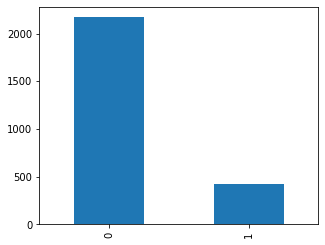

In [24]:
data['SUKCES'][data['Yr Sold'] != 2010].value_counts().plot.bar(figsize=(5.0, 4.0))

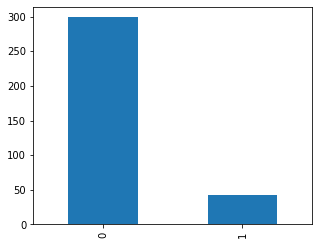

In [25]:
data['SUKCES'][data['Yr Sold'] == 2010].value_counts().plot.bar(figsize=(5.0, 4.0))

In [26]:
#sprawdzenie, która zmienna jest najbardziej skorelowana ze zmienną sukces
data.drop(['Mo Sold', 'Yr Sold', 'SUKCES'], axis =1).corr()['SalePrice'].reset_index().sort_values(by='SalePrice', ascending=False)

,index,SalePrice
35,SalePrice,1.000000
5,Overall Qual,0.799262
17,Gr Liv Area,0.706780
26,Garage Cars,0.647812
27,Garage Area,0.640381
13,Total Bsmt SF,0.632164
14,1st Flr SF,0.621676
7,Year Built,0.558426
20,Full Bath,0.545604
8,Year Remod/Add,0.532974


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


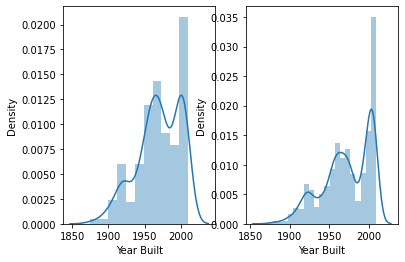

In [27]:
#porównanie czy zaproponowany podział jest ok na podstawie zmiennych najbardziej skrelowanych z ceną (SalePrice)
fig, ax =plt.subplots(1,2)
sns.distplot(data['Year Built'][data['Yr Sold'] == 2010], ax=ax[0])
sns.distplot(data['Year Built'][data['Yr Sold'] != 2010], ax=ax[1])
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


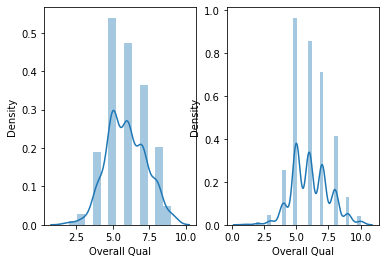

In [28]:
fig, ax =plt.subplots(1,2)
sns.distplot(data['Overall Qual'][data['Yr Sold'] == 2010], ax=ax[0])
sns.distplot(data['Overall Qual'][data['Yr Sold'] != 2010], ax=ax[1])
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


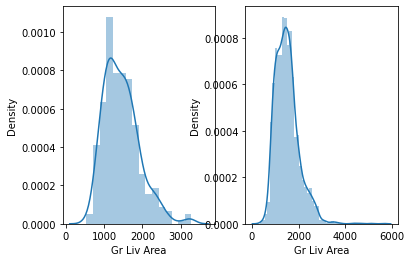

In [29]:
fig, ax =plt.subplots(1,2)	
sns.distplot(data['Gr Liv Area'][data['Yr Sold'] == 2010], ax=ax[0])
sns.distplot(data['Gr Liv Area'][data['Yr Sold'] != 2010], ax=ax[1])
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


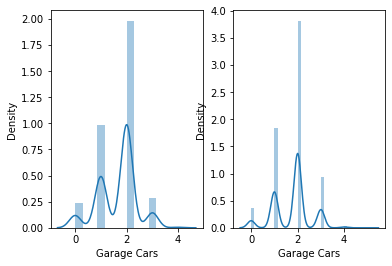

In [30]:
fig, ax =plt.subplots(1,2)	
sns.distplot(data['Garage Cars'][data['Yr Sold'] == 2010], ax=ax[0])
sns.distplot(data['Garage Cars'][data['Yr Sold'] != 2010], ax=ax[1])
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


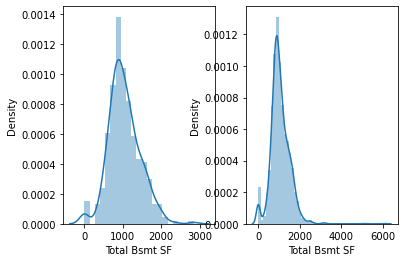

In [31]:
fig, ax =plt.subplots(1,2)	
sns.distplot(data['Total Bsmt SF'][data['Yr Sold'] == 2010], ax=ax[0])
sns.distplot(data['Total Bsmt SF'][data['Yr Sold'] != 2010], ax=ax[1])
fig.show()

Wygląda to dobrze, więc możemy wziać 2010 rok jako zbiór testowy

###Modelowanie

In [32]:
#skopiowanie df na potrzeby różnego podejścia do preprocesingu
data2 = data.copy()
data3 = data.copy()

In [34]:
columns = data.select_dtypes('object').columns
data = pd.get_dummies(data, columns = columns)
#zamiana pustych wartości
data

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,1,526301100,20,141.0,31770,6,5,1960,1960,112.0,...,0,0,0,1,0,0,0,0,1,0
1,2,526350040,20,80.0,11622,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
2,3,526351010,20,81.0,14267,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
3,4,526353030,20,93.0,11160,7,5,1968,1968,0.0,...,0,0,0,1,0,0,0,0,1,0
4,5,527105010,60,74.0,13830,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,37.0,7937,6,6,1984,1984,0.0,...,0,0,0,1,0,0,0,0,1,0
2926,2927,923276100,20,0.0,8885,5,5,1983,1983,0.0,...,0,0,0,1,0,0,0,0,1,0
2927,2928,923400125,85,62.0,10441,5,5,1992,1992,0.0,...,0,0,0,1,0,0,0,0,1,0
2928,2929,924100070,20,77.0,10010,5,5,1974,1975,0.0,...,0,0,0,1,0,0,0,0,1,0


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


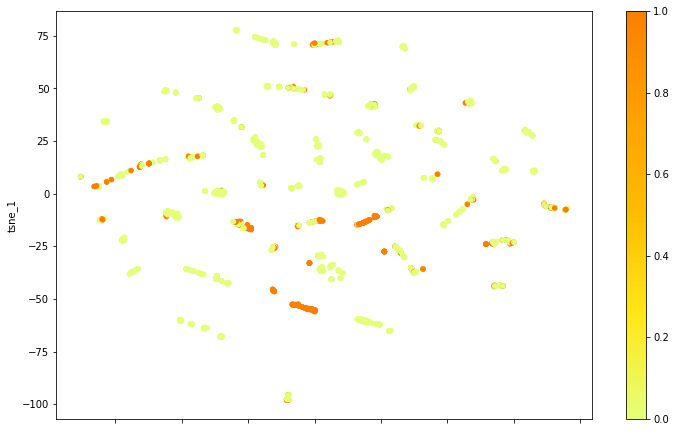

In [35]:
#odseparowanie klas za pomoca TSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
data_2d = tsne.fit_transform(
    data.drop(columns=['Mo Sold', 'Yr Sold', 'SalePrice', 'SUKCES'])
)
data_2d_df = pd.DataFrame(data_2d, columns = ['tsne_0', 'tsne_1'])
data_2d_df.plot.scatter(x='tsne_0', y='tsne_1', c=data['SUKCES'], cmap='Wistia', figsize=(12.0, 7.5))

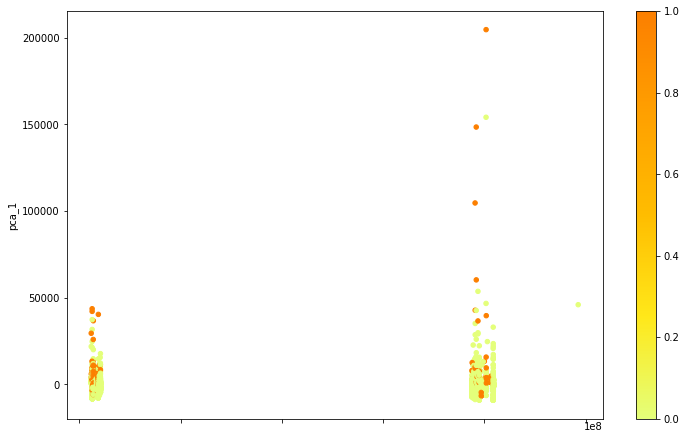

In [36]:
#odseparowanie klas za pomoca PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_2d = pca.fit_transform(
    data.drop(columns=['Mo Sold', 'Yr Sold', 'SalePrice', 'SUKCES'])
)
data_2d_df = pd.DataFrame(data_2d, columns = ['pca_0', 'pca_1'])
data_2d_df.plot.scatter(x='pca_0', y='pca_1', c=data['SUKCES'], cmap='Wistia', figsize=(12.0, 7.5))

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

train = data[data['Yr Sold'] != 2010]
train.reset_index(drop=True, inplace = True)
validation = data[data['Yr Sold'] == 2010]
validation.reset_index(drop=True, inplace = True)
def data_split_X_y(data):
  y = data['SUKCES']
  X = data.drop(['Order', 'PID', 'Mo Sold', 'Yr Sold', 'SalePrice', 'SUKCES'], axis = 1)
  return X,y
def data_split(X,y):
  #Podział na część treningową i testową
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=515, stratify=y)
  return X_train, X_test, y_train, y_test
pipeline = Pipeline(steps=[
    ("scaler", MinMaxScaler()),
    ("classification", LogisticRegression(penalty='none', max_iter=10_000)),

])

X,y = data_split_X_y(train)
X_validation, y_validation = data_split_X_y(validation)
X_train, X_test, y_train, y_test = data_split(X,y)
pipeline.fit(X_train,y_train)


Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classification',
                 LogisticRegression(max_iter=10000, penalty='none'))])

In [38]:
pd.DataFrame({
    'coef:': pipeline.steps[1][1].coef_[0]
}, index=X_train.columns)

,coef:
MS SubClass,-32.751028
Lot Frontage,1.720851
Lot Area,169.017569
Overall Qual,26.356309
Overall Cond,2.100956
...,...
Sale Condition_AdjLand,-0.188958
Sale Condition_Alloca,15.495454
Sale Condition_Family,-5.187087
Sale Condition_Normal,-3.363598


In [39]:
print("""
{0}
***TRENING***
{1}
***TEST***
{2}
***VALIDATION***
{3}
""".format("LogisticRegression",
           classification_report(y_train, pipeline.predict(X_train)),
           classification_report(y_test, pipeline.predict(X_test)),
           classification_report(y_validation, pipeline.predict(X_validation))))


LogisticRegression
***TRENING***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1736
           1       0.98      0.98      0.98       335

    accuracy                           0.99      2071
   macro avg       0.99      0.99      0.99      2071
weighted avg       0.99      0.99      0.99      2071

***TEST***
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       434
           1       0.79      0.86      0.82        84

    accuracy                           0.94       518
   macro avg       0.88      0.91      0.89       518
weighted avg       0.94      0.94      0.94       518

***VALIDATION***
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       299
           1       0.70      0.71      0.71        42

    accuracy                           0.93       341
   macro avg       0.83      0.84      0.83       341
weighted avg

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neightbors": range(1, 10)
                       }, cv=5, scoring="f1",
                       verbose=1)
pipeline_knn = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("classifier", GridSearchCV(KNeighborsClassifier(),
                                param_grid={
                                    "n_neighbors": range(1, 10)
                                }, cv = 5, scoring="f1",
                                verbose=1, n_jobs=6, refit=True))
])

pipeline_knn.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
                              param_grid={'n_neighbors': range(1, 10)},
                              scoring='f1', verbose=1))])

In [41]:
print("""
{0}
***TRENING***
{1}
***TEST***
{2}
***VALIDATION***
{3}
""".format("KNeighborsClassifier",
           classification_report(y_train, pipeline_knn.predict(X_train)),
           classification_report(y_test, pipeline_knn.predict(X_test)),
           classification_report(y_validation, pipeline_knn.predict(X_validation))))


KNeighborsClassifier
***TRENING***
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1736
           1       1.00      1.00      1.00       335

    accuracy                           1.00      2071
   macro avg       1.00      1.00      1.00      2071
weighted avg       1.00      1.00      1.00      2071

***TEST***
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       434
           1       0.82      0.65      0.73        84

    accuracy                           0.92       518
   macro avg       0.88      0.81      0.84       518
weighted avg       0.92      0.92      0.92       518

***VALIDATION***
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       299
           1       0.80      0.57      0.67        42

    accuracy                           0.93       341
   macro avg       0.87      0.78      0.81       341
weighted a

In [42]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# data2 = pd.read_csv("/content/AmesHousing.csv")
# data2['SUKCES'] = 0
# data2['SUKCES'][data2['SalePrice']>=250_000] = 1
data2.replace([np.inf, -np.inf], np.nan, inplace=True)

train2 = data2[data2['Yr Sold'] != 2010]
train2.reset_index(drop=True, inplace = True)
validation2 = data2[data2['Yr Sold'] == 2010]
validation2.reset_index(drop=True, inplace = True)
X2,y2 = data_split_X_y(train2)
X_validation2, y_validation2 = data_split_X_y(validation2)
X_train2, X_test2, y_train2, y_test2 = data_split(X2,y2)

categorical_features = X_train2.select_dtypes(["object", "category"]).columns
numerical_features = X_train2.select_dtypes(["int", "float"]).columns
X_train2[numerical_features] = X_train2[numerical_features].fillna(0.0)
X_test2[numerical_features] = X_test2[numerical_features].fillna(0.0)
X_validation2[numerical_features] = X_validation2[numerical_features].fillna(0.0)

categorical_transformer = Pipeline(steps=[
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer(transformers=[
    ("categorical", categorical_transformer, categorical_features),
    ("numerical", "passthrough", numerical_features)
])

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ab_param_grid = {
    "n_estimators": [2, 5, 10, 25, 100, 1_000]
}
ab_classifier = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", GridSearchCV(AdaBoostClassifier(random_state=505),
                                param_grid=ab_param_grid, scoring="f1", n_jobs=8,
                                verbose=1, cv=5, return_train_score=True)),
])
ab_classifier.fit(X_train2, y_train2)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterio...
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Have_Garage'],
      dtype='object'))])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=AdaBoostClassifier(random_state=

In [44]:
print("""
{0}
***Best score***
{1}
***TRENING***
{2}
***TEST***
{3}
***VALIDATION***
{4}
""".format("AdaBoostClassifier", 
           ab_classifier.named_steps["classifier"].best_score_,
           classification_report(y_train2, ab_classifier.predict(X_train2)),
           classification_report(y_test2, ab_classifier.predict(X_test2)),
           classification_report(y_validation2, ab_classifier.predict(X_validation2))))


AdaBoostClassifier
***Best score***
0.8488265705402839
***TRENING***
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1736
           1       0.97      0.98      0.97       335

    accuracy                           0.99      2071
   macro avg       0.98      0.99      0.98      2071
weighted avg       0.99      0.99      0.99      2071

***TEST***
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       434
           1       0.89      0.80      0.84        84

    accuracy                           0.95       518
   macro avg       0.93      0.89      0.91       518
weighted avg       0.95      0.95      0.95       518

***VALIDATION***
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       299
           1       0.86      0.76      0.81        42

    accuracy                           0.96       341
   macro avg       0.92      0

In [45]:
from xgboost import XGBClassifier
xgb_param_grid = {
    "n_estimators": [2, 5, 10, 25, 100],
    "max_depth": range(3,9,2),
    "learning_rate": [0.01, 0.1, 1.0]
}

xgb_classifier = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", GridSearchCV(XGBClassifier(random_state=505),
                                param_grid=xgb_param_grid, scoring="f1", n_jobs=8,
                                verbose=1, cv=5, return_train_score=True))
])
xgb_classifier.fit(X_train2, y_train2)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterio...
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Have_Garage'],
      dtype='object'))])),
                ('classifier',
                 GridSearchCV(cv=5, estimator=XGBClassifier(random_state=505),
                              n_jobs=8,
                              param_grid={'learning_rate': [0

In [46]:
print("""
{0}
***best_score_***
{1}
***TRENING***
{2}
***TEST***
{3}
***VALIDATION***
{4}
""".format("XGBClassifier", 
           xgb_classifier.named_steps["classifier"].best_score_,
           classification_report(y_train2, xgb_classifier.predict(X_train2)),
           classification_report(y_test2, xgb_classifier.predict(X_test2)),
           classification_report(y_validation2, xgb_classifier.predict(X_validation2))))


XGBClassifier
***best_score_***
0.8596010287193607
***TRENING***
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1736
           1       0.98      0.97      0.98       335

    accuracy                           0.99      2071
   macro avg       0.99      0.98      0.99      2071
weighted avg       0.99      0.99      0.99      2071

***TEST***
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       434
           1       0.93      0.83      0.88        84

    accuracy                           0.96       518
   macro avg       0.95      0.91      0.93       518
weighted avg       0.96      0.96      0.96       518

***VALIDATION***
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       299
           1       0.84      0.74      0.78        42

    accuracy                           0.95       341
   macro avg       0.90      0.86 

### Budowa modelu na całym zbiorze treningowym (bez podziału na zbór testowy) z wykluczeniem cen domów w otoczeniu ceny 250_000

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# data3 = pd.read_csv("/content/AmesHousing.csv")
# data3['SUKCES'] = 0
# data3['SUKCES'][data3['SalePrice']>=250_000] = 1

data3.replace([np.inf, -np.inf], np.nan, inplace=True)

train3 = data3[data3['Yr Sold'] != 2010]
train3.reset_index(drop=True, inplace = True)
train3['SUKCES'][train3['SalePrice']>=240_000][train3['SalePrice']<=260_000]  = 2

validation3 = data3[data3['Yr Sold'] == 2010]
validation3.reset_index(drop=True, inplace = True)
X3,y3 = data_split_X_y(train3[train3['SUKCES'] != 2])
X_validation3, y_validation3 = data_split_X_y(validation3)
# X_train3, X_test3, y_train3, y_test3 = data_split(X3,y3)

categorical_features = X3.select_dtypes(["object", "category"]).columns
numerical_features = X3.select_dtypes(["int", "float"]).columns
X3[numerical_features] = X3[numerical_features].fillna(0.0)
X3[numerical_features] = X3[numerical_features].fillna(0.0)
X_validation3[numerical_features] = X_validation3[numerical_features].fillna(0.0)

categorical_transformer = Pipeline(steps=[
    ("one_hot_encoding", OneHotEncoder(handle_unknown="ignore")),
])

preprocessor = ColumnTransformer(transformers=[
    ("categorical", categorical_transformer, categorical_features),
    ("numerical", "passthrough", numerical_features)
])

In [48]:
from sklearn.ensemble import AdaBoostClassifier
ab_param_grid = {
    "n_estimators": [2, 5, 10, 25, 100, 1_000]
}
ab_classifier = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", GridSearchCV(AdaBoostClassifier(random_state=505),
                                param_grid=ab_param_grid, scoring="f1", n_jobs=8,
                                verbose=1, cv=5, return_train_score=True)),
])
ab_classifier.fit(X3, y3)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterio...
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val'],
      dtype='object'))])),
                ('classifier',
                 GridSearchCV(cv=5,
                              estimator=AdaBoostClassifier(random_stat

In [49]:

print("""
{0}
***best_score_***
{1}
***TRENING***
{2}
***VALIDATION***
{3}
""".format("AdaBoostClassifier", 
           ab_classifier.named_steps["classifier"].best_score_,
           classification_report(y3, ab_classifier.predict(X3)),
           classification_report(y_validation3, ab_classifier.predict(X_validation3))))


AdaBoostClassifier
***best_score_***
0.8576729498266404
***TRENING***
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2170
           1       0.97      0.96      0.97       419

    accuracy                           0.99      2589
   macro avg       0.98      0.98      0.98      2589
weighted avg       0.99      0.99      0.99      2589

***VALIDATION***
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       299
           1       0.80      0.83      0.81        42

    accuracy                           0.95       341
   macro avg       0.89      0.90      0.89       341
weighted avg       0.95      0.95      0.95       341




In [50]:
# from xgboost import XGBClassifier
xgb_param_grid = {
    "n_estimators": [2, 5, 10, 25, 100, 120],
    "max_depth": range(3,9,2),
    "learning_rate": [0.01, 0.1, 1.0],
    'min_child_weight': [1, 2, 5]
}

xgb_classifier = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", GridSearchCV(XGBClassifier(random_state=505),
                                param_grid=xgb_param_grid, scoring="f1", n_jobs=8,
                                verbose=1, cv=5, return_train_score=True))
])

xgb_classifier.fit(X3, y3)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('one_hot_encoding',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterio...
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val'],
      dtype='object'))])),
                ('classifier',
                 GridSearchCV(cv=5, estimator=XGBClassifier(random_state=505),
                              n_jobs=8,
                              param_grid={'learning_rate': [0.01, 0.1, 1.0],
                                          'max_depth

In [51]:
print("""
{0}
***best_score_***
{1}
***Best hyperparameters***
{2}
***Best estimator***
{3}
***TRENING***
{4}
***VALIDATION***
{5}
""".format("XGBClassifier", 
           xgb_classifier.named_steps["classifier"].best_score_,
           xgb_classifier.named_steps["classifier"].best_params_,
           xgb_classifier.named_steps["classifier"].best_estimator_,
           classification_report(y3, xgb_classifier.predict(X3)),
           classification_report(y_validation3, xgb_classifier.predict(X_validation3))))


XGBClassifier
***best_score_***
0.8747936179224555
***Best hyperparameters***
{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 120}
***Best estimator***
XGBClassifier(min_child_weight=2, n_estimators=120, random_state=505)
***TRENING***
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2170
           1       0.97      0.97      0.97       419

    accuracy                           0.99      2589
   macro avg       0.98      0.98      0.98      2589
weighted avg       0.99      0.99      0.99      2589

***VALIDATION***
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       299
           1       0.84      0.76      0.80        42

    accuracy                           0.95       341
   macro avg       0.90      0.87      0.89       341
weighted avg       0.95      0.95      0.95       341




In [54]:
X3_dum = pd.get_dummies(data3, columns = columns)

In [55]:
pd.DataFrame(xgb_classifier.named_steps["classifier"].best_estimator_.feature_importances_, index = X3_dum.columns).sort_values(by=0, ascending=False).reset_index(drop=False)

ValueError: ignored